http://blog.yhat.com/posts/customer-segmentation-using-python.html

<h1>Analiza profilu klienta</h1>

Firma prowadzi kampanie handlowe wysyłając do klientów oferty. 

ZADANIE: Pobieramy dane z pliku "datasets/WineKMC.xlsx". Co się w nich znajduje?

In [35]:
import pandas as pd

df_offers = pd.read_excel("data_cl/WineKMC.xlsx", sheetname=0)
df_offers.columns = ["offer_id", "campaign", "varietal", "min_qty", "discount", "origin", "past_peak"]
df_offers.head(10)

C:\Users\marek\Anaconda3\lib\site-packages\pandas\io\excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


,offer_id,campaign,varietal,min_qty,discount,origin,past_peak
0,1,January,Malbec,72,56,France,False
1,2,January,Pinot Noir,72,17,France,False
2,3,February,Espumante,144,32,Oregon,True
3,4,February,Champagne,72,48,France,True
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True
5,6,March,Prosecco,144,86,Chile,False
6,7,March,Prosecco,6,40,Australia,True
7,8,March,Espumante,6,45,South Africa,False
8,9,April,Chardonnay,144,57,Chile,False
9,10,April,Prosecco,72,52,California,False


In [36]:
df_transactions = pd.read_excel("data_cl/WineKMC.xlsx", sheetname=1)
df_transactions.columns = ["customer_name", "offer_id"]
df_transactions['n'] = 1
df_transactions.head(10)

C:\Users\marek\Anaconda3\lib\site-packages\pandas\io\excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


,customer_name,offer_id,n
0,Smith,2,1
1,Smith,24,1
2,Johnson,17,1
3,Johnson,24,1
4,Johnson,26,1
5,Williams,18,1
6,Williams,22,1
7,Williams,31,1
8,Brown,7,1
9,Brown,29,1


Czego dotyczą dane? 

Są to wystawione oferty sprzedaży win (pierwsza karta) oraz informacja o transakcjach dokonanych przez poszczególnych klientów (druga karta). 

Firma będzie tworzyć nowe oferty. Chcielibyśmy wiedzieć do których klientów skierować poszczególne oferty. Możemy założyć że klientów jest milion i nie jesteśmy w stanie rozpatrzyć każdego indywidualnie. Poza tym klient może chcieć chcieć kupić coś innego, dlatego nie możemy się kierować tylko tym co już kupił.

ZADANIE: Stwórzmy tabelę, gdzie w wierszach są klienci a w kolumnach oferty - dla każdego klienta zaznaczmy czy wybrał daną ofertę (1) czy nie (0).

In [44]:
df.pivot_table(index=['customer_name'], columns=['offer_id'], values = 'n')

offer_id,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
customer_name,,,,,,,,,,,,,,,,,,,,,
Adams,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
Allen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Anderson,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Bailey,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
Baker,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
Barnes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
Bell,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Bennett,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Brooks,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
df.pivot_table(index=['customer_name'], columns=['offer_id'])

discount                                                        \
offer_id            1     2     3     4     5     6     7     8     9     10   
customer_name                                                                  
Adams              NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Allen              NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  57.0   NaN   
Anderson           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Bailey             NaN   NaN   NaN   NaN   NaN   NaN  40.0   NaN   NaN   NaN   
Baker              NaN   NaN   NaN   NaN   NaN   NaN  40.0   NaN   NaN  52.0   
Barnes             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  52.0   
Bell               NaN  17.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Bennett            NaN   NaN   NaN   NaN   NaN   NaN   NaN  45.0   NaN   NaN   
Brooks             NaN   NaN  32.0   NaN   NaN   NaN   NaN  45.0   NaN   NaN   
Brown              NaN   NaN   NaN   NaN   NaN   NaN  40.0   NaN   NaN   NaN   
Butler            56.0   NaN   NaN  48.0   NaN   NaN   NaN   NaN   NaN   NaN   
Campbell           NaN  17.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Carter             NaN   NaN   NaN   NaN   NaN   NaN  40.0   NaN   NaN   NaN   
Clark              NaN   NaN   NaN  48.0   NaN   NaN   NaN   NaN   NaN   NaN   
Collins            NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Cook               NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Cooper             NaN   NaN   NaN  48.0   NaN   NaN   NaN   NaN   NaN   NaN   
Cox                NaN  17.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Cruz               NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Davis              NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Diaz               NaN   NaN   NaN   NaN   NaN   NaN  40.0  45.0   NaN   NaN   
Edwards            NaN   NaN   NaN   NaN   NaN   NaN   NaN  45.0   NaN   NaN   
Evans              NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Fisher            56.0  17.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Flores             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Foster            56.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN  57.0   NaN   
Garcia             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Gomez              NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Gonzalez           NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  57.0   NaN   
Gray               NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
...                ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
Reed               NaN   NaN   NaN   NaN  44.0   NaN   NaN   NaN   NaN   NaN   
Reyes              NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  57.0   NaN   
Richardson         NaN   NaN  32.0   NaN   NaN  86.0   NaN   NaN   NaN   NaN   
Rivera             NaN   NaN   NaN   NaN   NaN   NaN  40.0   NaN   NaN   NaN   
Roberts            NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Robinson           NaN   NaN   NaN   NaN   NaN   NaN  40.0   NaN   NaN   NaN   
Rodriguez          NaN  17.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Rogers             NaN   NaN  32.0   NaN   NaN   NaN  40.0  45.0   NaN   NaN   
Ross               NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Russell            NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Sanchez            NaN   NaN   NaN  48.0  44.0   NaN   NaN   NaN   NaN   NaN   
Sanders           56.0   NaN   NaN  48.0  44.0  86.0   NaN   NaN  57.0   NaN   
Scott              NaN   NaN   NaN   NaN   NaN  86.0   NaN   NaN   NaN   NaN   
Smith              NaN  17.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Stewart            NaN   NaN   NaN   NaN   NaN   NaN   NaN  45.0   NaN   NaN   
Sullivan           NaN   NaN   NaN   NaN   NaN   NaN   NaN  45.0   NaN   NaN   
Taylor        

In [37]:
# join the offers and transactions table
df = pd.merge(df_offers, df_transactions)
# create a "pivot table" which will give us the number of times each customer responded to a given offer
matrix = df.pivot_table(index=['customer_name'], columns=['offer_id'], values='n')
# a little tidying up. fill NA values with 0 and make the index into a column
matrix = matrix.fillna(0).reset_index()
# # save a list of the 0/1 columns. we'll use these a bit later
x_cols = matrix.columns[1:]
# print(df)
# print("------------")
matrix.head()

offer_id,customer_name,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,Adams,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,Allen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Anderson,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bailey,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Baker,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [38]:
df.head()

,offer_id,campaign,varietal,min_qty,discount,origin,past_peak,customer_name,n
0,1,January,Malbec,72,56,France,False,Thomas,1
1,1,January,Malbec,72,56,France,False,Jackson,1
2,1,January,Malbec,72,56,France,False,Mitchell,1
3,1,January,Malbec,72,56,France,False,Peterson,1
4,1,January,Malbec,72,56,France,False,Wood,1


Podzielmy klientów na grupy (segmenty) - do jednej grupy włączamy podobnych klientów - podobni klienci reagują na podobne oferty. Użyjemy Kmeans do grupowania.

In [19]:
from sklearn.cluster import KMeans

cluster = KMeans(n_clusters=5, random_state = 42)
# slice matrix so we only include the 0/1 indicator columns in the clustering
matrix['cluster'] = cluster.fit_predict(matrix[matrix.columns[2:]])


ZADANIE: Jakie są liczności grup?

In [20]:
matrix.cluster.value_counts()

1    35
0    22
4    17
2    17
3     9
Name: cluster, dtype: int64

ZADANIE: Proszę zwizualizować wynik na płaszczyźnie (znacie odpowiednie metody)

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
transformed = pca.fit_transform(matrix[x_cols])
matrix['x'] = transformed[:,0]
matrix['y'] = transformed[:,1]
matrix = matrix.reset_index()

customer_clusters = matrix[['customer_name', 'cluster', 'x', 'y']]
customer_clusters.head()

offer_id,customer_name,cluster,x,y
0,Adams,1,1.007580,0.108215
1,Allen,0,-0.287539,0.044715
2,Anderson,4,-0.392032,1.038391
3,Bailey,1,0.699477,-0.022542
4,Baker,0,0.088183,-0.471695


In [23]:
import numpy as np
matrix.iloc[np.where(matrix['cluster'].values == 0)]['x']


1    -0.287539
4     0.088183
13   -0.579221
16   -0.406276
27   -0.412830
28   -0.339146
43   -0.504329
48   -0.596330
49   -0.382241
50   -0.168125
59   -0.064218
60   -0.202845
62   -0.110035
67   -0.118158
69   -0.187206
71   -0.266650
74   -0.202978
81   -1.274329
88    0.135104
90   -0.632199
92   -0.226293
98   -0.489805
Name: x, dtype: float64

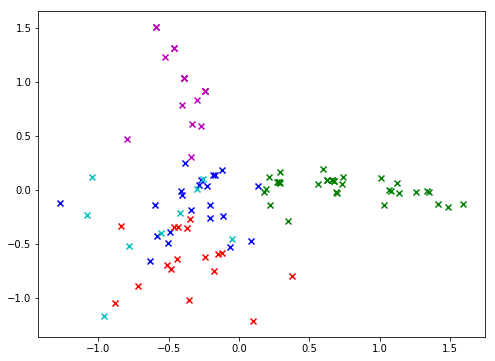

In [25]:
import matplotlib.pyplot as plt
import numpy as np



colors = ['b', 'g', 'r', 'c', 'm']

fig = plt.figure(figsize=(8,6))
for i in range(5):
    plt.scatter(matrix.iloc[np.where(matrix['cluster'].values == i)[0]]['x'], matrix.iloc[np.where(matrix['cluster'].values == i)[0]]['y'],
            marker='x', color=colors[i])

plt.show()


Zanalizujmy ostatni klaster.

ZADANIE: Dla każdego wina wylistować ilość klientów które go kupili - z klastra 4 i z innych klastrów. 

In [26]:
df['is_4'] = matrix['cluster']==4
df.groupby("is_4").varietal.value_counts()

is_4   varietal          
False  Prosecco              26
       Espumante             22
       Champagne             11
       Malbec                 8
       Chardonnay             7
       Pinot Noir             7
       Cabernet Sauvignon     2
True   Prosecco               5
       Espumante              4
       Pinot Noir             3
       Cabernet Sauvignon     2
       Malbec                 2
       Champagne              1
Name: varietal, dtype: int64

Które wino jest kupowane tylko przez ten klaster, a które wcale?

ZADANIE: Spójrzmy na numeryczne atrybuty. Jak jest średnia ilości i rabatu?

In [13]:
df.groupby("is_4")[['min_qty', 'discount']].mean()

,min_qty,discount
is_4,,
False,66.578313,48.277108
True,69.882353,44.588235


Czy ci klienci kupują duże czy małe ilości?

In [14]:
df.groupby("is_4")[['min_qty', 'discount']].std()

,min_qty,discount
is_4,,
False,56.925737,17.365731
True,56.997678,19.697902
